# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


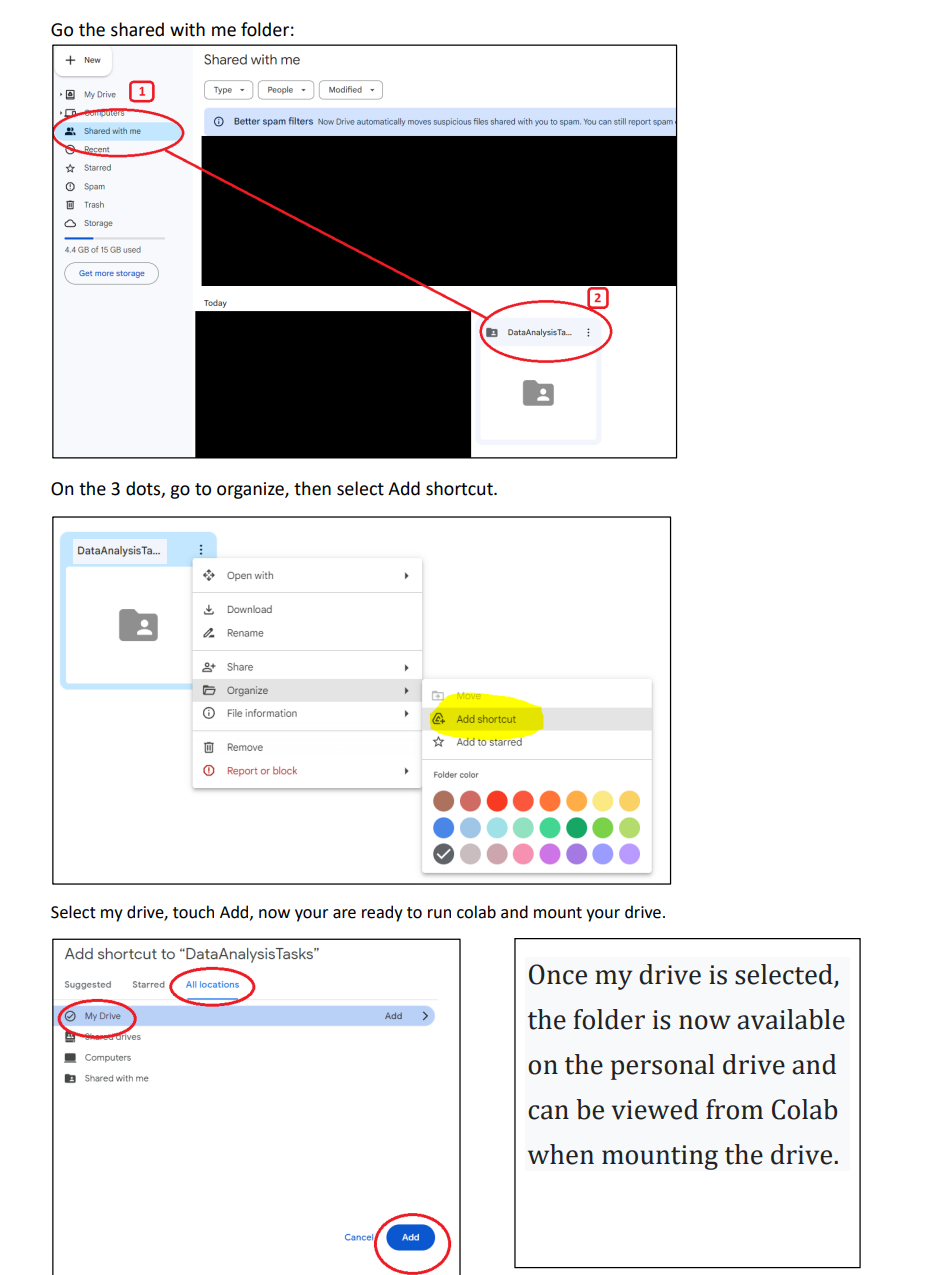

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/vehicle_insurance_claim_fraud_detection.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from bokeh.plotting import figure
from bokeh.tile_providers import Vendors
from bokeh.io import output_notebook, show
from bokeh.palettes import Blues256

def to_web_mercator(df, lon="X", lat="Y"):
    """
    Function to convert latitude and longitude to Web Mercator coordinates.

    Parameters:
    df (pd.DataFrame): DataFrame containing latitude and longitude columns.
    lon (str): Column name for longitude. Default is "X".
    lat (str): Column name for latitude. Default is "Y".

    Returns:
    df (pd.DataFrame): DataFrame with converted coordinates.
    """
    k = 6378137
    df["X"] = df[lon] * (k * np.pi/180.0)
    df["Y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

def hist2d(x, y, N):
    """
    Function to compute 2D histogram of the data.

    Parameters:
    x, y (array-like): Input data.
    N (int): Number of bins for the histogram.

    Returns:
    X, Y (2D array): The x and y coordinates of the histogram.
    z (2D array): The computed histogram.
    """
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    H, xedges, yedges = np.histogram2d(
                          x, y,
                          bins=N,
                          range=[[xmin, xmax], [ymin, ymax]],
                          density=True
                        )
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

    # Apply a logarithmic transformation to get Z
    Z = np.log(H.T + 1e-10)  # Adding a small constant to avoid log(0)

    return X, Y, Z


def plot_map(df):
    """
    Function to plot the data on a map.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.

    Returns:
    None
    """
    # Create a Bokeh figure
    p = figure(
          width=800,
          height=900,
          x_range=(df.X.min(), df.X.max()),
          y_range=(df.Y.min(), df.Y.max()),
          x_axis_type="mercator",
          y_axis_type="mercator",
          title="Contour Plot of Crime Density in SanFrancisco",
          tools='crosshair, copy, pan, box_zoom'
        )

    p.grid.level = "overlay"
    p.grid.grid_line_color = "black"
    p.grid.grid_line_alpha = 0.05

    # Add a tile map to the figure
    p.add_tile(Vendors.CARTODBPOSITRON)

    # Compute 2D histogram of the data
    x, y, z = hist2d(df.X, df.Y, 30)

    # Define color palette and levels
    palette = Blues256[::-1]
    levels = np.linspace(np.min(z), np.max(z), 20)

    # Add a contour plot to the figure
    p.contour(x, y, z, levels[1:], fill_color=palette, line_color=palette)

    # Show the plot
    show(p)


# Set the output to notebook
output_notebook()

# Read the data from the CSV file
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/sanfrancisco_crimes_data_2016.csv")

# Convert coordinates to Web Mercator
df = to_web_mercator(df)

# Plot the data
plot_map(df)